<ul>
  <li><a href=#question1>1. Independent variable and dependent variable.</a></li>
  <li><a href=#question2>2. Hypothesis and type of statistical test.</a></li>
  <li><a href=#question3>3. Descriptive statistics: measure of central tendancy and measure of varaibility.</a></li>
  <li><a href=#question4>4. Visualizing the sample data.</a></li>
  <li><a href=#question5>5. Results of statistical test and conclusions.<a></li>
  <li><a href=#question6>6. Optional: possible causes and equivalent tasks.</a></li>
  
</ul>

# Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font color='red'>RED</font>,<font color='blue'> BLUE</font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font color='green'>PURPLE</font>, <font color='purple'>ORANGE</font>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

# Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

<a id='question1'></a>

### 1. What is our independent variable? What is our dependent variable?

The independent variable is the condition. There are two conditions in this case, the congruent words condition and the incongruent words condition.\n
The dependent variable is the time it takes to name the ink colors. 

<a id='question2'></a>

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

We have two conditions and for the null hypothesis we take that $\mu$ in the first condition is the same as $\mu$ for the second condition. For the alternative hypothesis we say that $\mu_{congruent}$ is smaller than $\mu_{incongruent}$. We want to the test if people are faster in the first condition than the second.

$$H_0: \mu_{C} = \mu_{I} (\mu_{C} - \mu_{I} = 0)$$
$$H_a: \mu_{C} < \mu_{I} (\mu_{C} - \mu_{I} < 0)$$

A t-test applies to this example because:
1. We have 24 samples which is less than 30.
2. We don't know the population's standard deviation. (We're trying to estimate the mean of a normally distributed population).
3. Assumption of normality, based on the histogram and Q-Q plots the distributions of both samples and the differences seem normal.(<a href=#qq-plot>See Q-Q plot</a>)

http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/
As this is a within-subject design a dependent t-test for paired samples would the best choice. And in this case a one-tailed test in the negative direction. And we will choose an alpha level of 0.01.

#### My Personal results

Word Set #1 = 15.57 seconds (Congruent)  
Word Set #2 = 23.041 seconds (Incongruent)

<a id='question3'></a>

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [3]:
# First we load the data and display it
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
stroop_effect = pd.read_csv('stroopdata.csv')
stroop_effect.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
stroop_effect['Differences'] = stroop_effect['Congruent'] - stroop_effect['Incongruent']
stroop_effect.head()

,Congruent,Incongruent,Differences
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


In [5]:
# calculate and display average, std and n for both samples and their difference
con_avg = stroop_effect['Congruent'].mean()
con_med = stroop_effect['Congruent'].median()
con_S = stroop_effect['Congruent'].std()
con_n = stroop_effect['Congruent'].count()
incon_avg = stroop_effect['Incongruent'].mean()
incon_med = stroop_effect['Incongruent'].median()
incon_S = stroop_effect['Incongruent'].std()
incon_n = stroop_effect['Incongruent'].count()
diff_avg = stroop_effect['Differences'].mean()
diff_med = stroop_effect['Differences'].median()
diff_S = stroop_effect['Differences'].std()
diff_n = stroop_effect['Differences'].count()
print("The Congruent test results have %.2f as a mean with a standard deviation of %.2f for a total sample size of %.2f" %(con_avg, con_S, con_n))
print("The Incongruent test results have %.2f as a mean with a standard deviation of %.2f for a total sample size of %.2f" %(incon_avg, incon_S, incon_n))


The Congruent test results have 14.05 as a mean with a standard deviation of 3.56 for a total sample size of 24.00
The Incongruent test results have 22.02 as a mean with a standard deviation of 4.80 for a total sample size of 24.00


In [6]:
statstable = pd.DataFrame(
    {'1. Congruent' : pd.Series([con_n, con_avg, con_med, con_S], index=['Sample size', 'Mean', 'Median', 'Std']),
     '2. Incongruent' : pd.Series([incon_n, incon_avg, incon_med, incon_S], index=['Sample size', 'Mean', 'Median', 'Std']),
     '3. Differences' : pd.Series([diff_n, diff_avg, diff_med, diff_S], index=['Sample size', 'Mean', 'Median', 'Std'])})

# a bit later I found out you can just use the describe function.
stroop_effect.describe()

,Congruent,Incongruent,Differences
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


<a id='question4'></a>

## 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Populating the interactive namespace from numpy and matplotlib


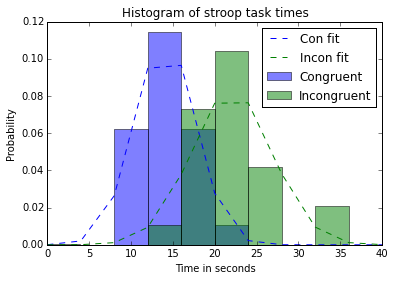

What you see here is the probability distribution of total time per task. The darker region shows the overlap for the congruent and incongruent tasks.


In [7]:
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist
import matplotlib.mlab as mlab
%pylab inline

num_bins = 10
plt.figure()

# Display histogram and fit for the congruent task
n, bins, patches = plt.hist(x=stroop_effect['Congruent'], bins=num_bins, range=(0,40), normed=True, label='Congruent', stacked=False, alpha=0.5)
y = mlab.normpdf(bins, con_avg, con_S)
plt.plot(bins, y, 'b--', label='Con fit')

# Display histogram and fit for the incongruent task
n, bins, patches = plt.hist(x=stroop_effect['Incongruent'], bins=num_bins, range=(0,40), normed=True, label='Incongruent', stacked=False, alpha=0.5)
z = mlab.normpdf(bins, incon_avg, incon_S)
plt.plot(bins, z, 'g--', label='Incon fit')

#legend, labels and title
plt.legend(prop={'size': 12})
plt.xlabel('Time in seconds')
plt.ylabel('Probability')
plt.title('Histogram of stroop task times')

plt.show()
plt.close()
print("What you see here is the probability distribution of total time per task. The darker region shows the overlap for the congruent and incongruent tasks.")

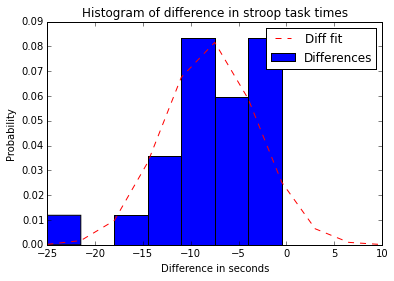

What you see here is the probability distribution of the difference of the paired samples. You can see that a lot of values are below zero meaning that the incongruent tasks in these samples took longer than the congruent task.


In [8]:
num_bins = 10
plt.figure()

# Display histogram and fit for the differences
n, bins, patches = plt.hist(x=stroop_effect['Differences'], bins=num_bins, range=(-25,10), normed=True, label='Differences')
d = mlab.normpdf(bins, diff_avg, diff_S)
plt.plot(bins, d, 'r--', label='Diff fit')

#legend, labels and title
plt.legend(prop={'size': 12})
plt.xlabel('Difference in seconds')
plt.ylabel('Probability')
plt.title('Histogram of difference in stroop task times')

plt.show()
print("What you see here is the probability distribution of the difference of the paired samples. You can see that a lot of values are below zero meaning that the incongruent tasks in these samples took longer than the congruent task.")

<a id='qq-plot'></a>

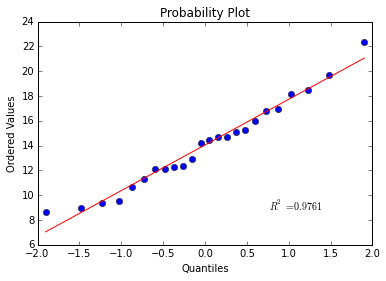

In [13]:
# http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.probplot.html
from scipy import stats
plt.figure()
con_prob = stats.probplot(stroop_effect['Congruent'], plot=plt)

plt.show()

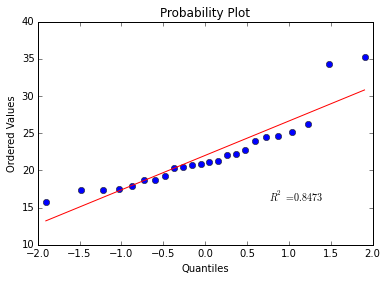

In [14]:
plt.figure()
incon_prob = stats.probplot(stroop_effect['Incongruent'], plot=plt)

plt.show()

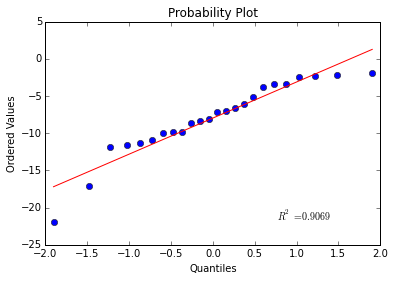

In [15]:
plt.figure()
incon_prob = stats.probplot(stroop_effect['Differences'], plot=plt)

plt.show()

<a id='question4'></a>

## 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [18]:
t_value = (con_avg - incon_avg) / (diff_S / math.sqrt(24))
df = diff_n - 1
t_critical = -2.5
CI_lower = diff_avg - 2.807*(diff_S/math.sqrt(24))
CI_upper = diff_avg + 2.807*(diff_S/math.sqrt(24))
cohens_d = diff_avg / diff_S
print("t(%s) = %.4f, p < 0.001, One-tailed negative direction" %(df, t_value))
print("Critical statistic value is %.2f" %(t_critical))
print("Confidence interval on the mean difference")
print("99%% CI = (%.4f,%.4f)" %(CI_lower, CI_upper))

t(23) = -8.0207, p < 0.001, One-tailed negative direction
Critical statistic value is -2.50
Confidence interval on the mean difference
99% CI = (-10.7522,-5.1774)


We choose an alpha level of 0.01 to which is equal the t critical value -2.5 relates for the one-tailed(negative direction) test. Everything in the critical area(t-stat < -2.5) has a probability of p < 0.01. In this case we have a t-stat of -8.0207 which is way below the t-critical value and has a probability of p < 0.001. 

Based on the above results we reject the null and we can say that there is a statiscally significant effect in the negative direction. The incongruent task takes more time than the congruent task. These results are in line with what I expected.

<a id='question6'></a>

## 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Reading a word goes faster, more automatic, than identifying a color. You have to suppress that automatic urge to say the color you read.

Person A: <i>"Complete the Sentence: ilk, ilk, ilk, a cow drinks ...?"</i>  
Person B: <i>"Milk!"</i>  
Person A: <i>"Nope, Water"</i>  

It rhymes and you associate cow with milk. This irrelevant for the statement of what a cow drinks but still you can trick many people this way.  
Person A: <i>"Ork, ork, ork, you eat soop with a ...?"</i>  
...  

Other than that I didn't know of any other similar effects. A similar effects seems to be Eriksen Flanker Task.


### Sources
http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/ 
http://pandas.pydata.org/  
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.probplot.html
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist  
https://en.wikipedia.org/wiki/Eriksen_flanker_task  